In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('./drive/My Drive/Colab Notebooks/Voice Recognition//')

import os 


In [0]:
#os.chdir('./drive/My Drive/Voice Recognition/')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [9]:
data = pd.read_csv('./data.csv')
data.head(3)

,Files,labels,Frequency,Audio_length,zcr_mean,sp_cen_mean,sp_rf_mean,mfcc_mean,spec_bw_mean,rmse_mean,chroma_stft_mean,Chromagram,MelSpectrohram,Amplitude_db
0,Copy of PTT-20190716-WA0040.wav,1,22050.0,1.70,0.095385,1557.936608,2977.110827,-21.310974,1446.468570,0.007986,0.461959,0.276743,0.042042,-45.591785
1,Copy of PTT-20190716-WA0041.wav,1,22050.0,1.79,0.115664,1774.966989,3151.163424,-14.459980,1608.826526,0.036079,0.299946,0.260970,0.822725,-30.595629
2,Copy of PTT-20190716-WA0042.wav,1,22050.0,2.62,0.117430,1853.480595,3594.329888,-15.858596,1635.967540,0.018241,0.338664,0.271582,0.203850,-36.165131


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 14 columns):
Files               582 non-null object
labels              582 non-null int64
Frequency           556 non-null float64
Audio_length        556 non-null float64
zcr_mean            556 non-null float64
sp_cen_mean         556 non-null float64
sp_rf_mean          556 non-null float64
mfcc_mean           556 non-null float64
spec_bw_mean        556 non-null float64
rmse_mean           556 non-null float64
chroma_stft_mean    556 non-null float64
Chromagram          556 non-null float64
MelSpectrohram      556 non-null float64
Amplitude_db        556 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 63.7+ KB


In [0]:
data = data.dropna()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 581
Data columns (total 14 columns):
Files               556 non-null object
labels              556 non-null int64
Frequency           556 non-null float64
Audio_length        556 non-null float64
zcr_mean            556 non-null float64
sp_cen_mean         556 non-null float64
sp_rf_mean          556 non-null float64
mfcc_mean           556 non-null float64
spec_bw_mean        556 non-null float64
rmse_mean           556 non-null float64
chroma_stft_mean    556 non-null float64
Chromagram          556 non-null float64
MelSpectrohram      556 non-null float64
Amplitude_db        556 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 65.2+ KB


In [13]:
data2 = data.drop(['Audio_length','Frequency'],axis=1)
data2.head(3)

,Files,labels,zcr_mean,sp_cen_mean,sp_rf_mean,mfcc_mean,spec_bw_mean,rmse_mean,chroma_stft_mean,Chromagram,MelSpectrohram,Amplitude_db
0,Copy of PTT-20190716-WA0040.wav,1,0.095385,1557.936608,2977.110827,-21.310974,1446.468570,0.007986,0.461959,0.276743,0.042042,-45.591785
1,Copy of PTT-20190716-WA0041.wav,1,0.115664,1774.966989,3151.163424,-14.459980,1608.826526,0.036079,0.299946,0.260970,0.822725,-30.595629
2,Copy of PTT-20190716-WA0042.wav,1,0.117430,1853.480595,3594.329888,-15.858596,1635.967540,0.018241,0.338664,0.271582,0.203850,-36.165131


In [14]:
# load 
import librosa
import librosa.display
sampledata, sampling_rate = librosa.load('../Voice Recognition/Files/Copy of PTT-20190716-WA0065.wav', sr=44100 )
from IPython.display import Audio
Audio(data=sampledata, rate=sampling_rate)

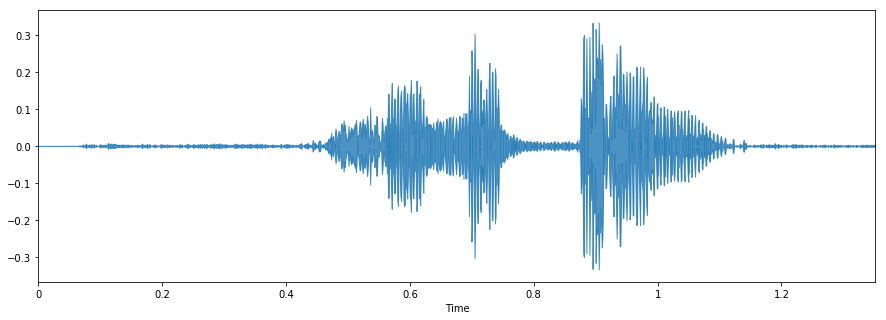

In [15]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(sampledata,sampling_rate,alpha=0.8)

In [0]:
X = data2.iloc[:,2:]



In [0]:
Y = data2.labels

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(X)


In [19]:
x.shape

(556, 10)

In [0]:
x_reshpe = x.reshape(556,10,1)

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [22]:
y = ohe.fit_transform(np.array(Y).reshape(-1,1)).toarray()
y.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(556, 4)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [0]:
# import keras modules
from keras.models import Sequential
from keras.layers import Dense

In [0]:
# define vars
input_num_units = 10
hidden1_num_units = 1024
hidden2_num_units = 1024
hidden3_num_units = 1024
hidden4_num_units = 1024
hidden5_num_units = 1024
output_num_units = 4

In [0]:
epochs = 100
batch_size = 128

In [142]:
model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, activation="relu", units=1024)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", units=1024)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", units=1024)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", units=1024)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu",

In [0]:
from tensorflow.keras import callbacks

In [0]:
class PrintDot(callbacks.Callback):
  def on_epoch_end(self,epoch,log):
    if epoch%10 == 0:
      print('')
      print('.',end='')

In [145]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 1024)              11264     
_________________________________________________________________
dense_87 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_88 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_89 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_90 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_91 (Dense)             (None, 4)                 4100      
Total params: 4,213,764
Trainable params: 4,213,764
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# gradient descent
# sgd
# adam

In [147]:
result = model.fit(x=x_train,y=y_train,batch_size=16,epochs=100,validation_data=[x_test,y_test],callbacks=[PrintDot()])

Train on 444 samples, validate on 112 samples
Epoch 1/100
444/444 [==============================] - 6s 13ms/step - loss: 1.2239 - acc: 0.4279 - val_loss: 1.1115 - val_acc: 0.5625

.Epoch 2/100
444/444 [==============================] - 3s 6ms/step - loss: 1.1050 - acc: 0.5293 - val_loss: 1.1061 - val_acc: 0.5446
Epoch 3/100
444/444 [==============================] - 3s 6ms/step - loss: 1.0461 - acc: 0.5631 - val_loss: 1.0580 - val_acc: 0.5089
Epoch 4/100
444/444 [==============================] - 3s 6ms/step - loss: 1.0037 - acc: 0.5743 - val_loss: 0.9969 - val_acc: 0.5714
Epoch 5/100
444/444 [==============================] - 3s 6ms/step - loss: 1.0059 - acc: 0.5923 - val_loss: 1.0044 - val_acc: 0.5625
Epoch 6/100
444/444 [==============================] - 3s 6ms/step - loss: 0.9395 - acc: 0.6059 - val_loss: 0.9937 - val_acc: 0.5982
Epoch 7/100
444/444 [==============================] - 3s 6ms/step - loss: 0.8629 - acc: 0.6261 - val_loss: 1.3301 - val_acc: 0.5893
Epoch 8/100
444/444 

In [0]:
his = pd.DataFrame(result.history)

In [149]:
his.head()

,val_loss,val_acc,loss,acc
0,1.111492,0.562500,1.223851,0.427928
1,1.106075,0.544643,1.105003,0.529279
2,1.058011,0.508929,1.046062,0.563063
3,0.996877,0.571429,1.003653,0.574324
4,1.004386,0.562500,1.005883,0.592342


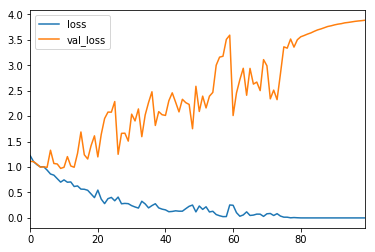

In [150]:
his[['loss','val_loss']].plot()


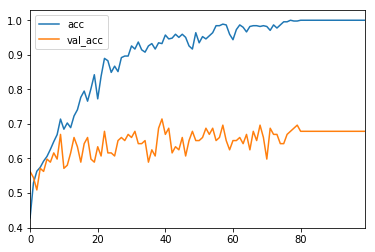

In [151]:
his[['acc','val_acc']].plot()

In [0]:
model.save('deep_network.h5')

In [0]:
import pickle 

In [0]:
filename = open('deep_network_result.pkl','wb')
pickle.dump(model,filename)

In [155]:
ls

 Apriori.ipynb                 Naive_Bayes.ipynb
'Audio (1).ipynb'              Namskaram/
 Audio.ipynb                   ngrok
 Baagunnaava/                  ngrok-stable-linux-amd64.zip
'CNN Model.ipynb'              ngrok-stable-linux-amd64.zip.1
 data.csv                      ngrok-stable-linux-amd64.zip.2
 data.npz                     'NN with Regularization.ipynb'
'Decision Tree.ipynb'          Others/
 deep_network.h5              'Random Forest.ipynb'
 deep_network_result.pkl       reg/
'Feature Extraction.ipynb'     reg2/
 Files/                        svc_classifier.pkl
'K - Means Clustering.ipynb'   SVM.ipynb
 KNN.ipynb                     swagatham/
'Logistic Regression.ipynb'   'TensorFlow Model.ipynb'
 logs/                         Tensorflow_nn.ipynb
 logs_train/                   Testing.ipynb
'Model Building.ipynb'         XGBoost.ipynb
'Model Building_ NN.ipynb'


In [156]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d = model.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 444 samples, validate on 112 samples
Epoch 1/100
444/444 [==============================] - 4s 8ms/step - loss: 3.3458e-06 - acc: 1.0000 - val_loss: 3.9964 - val_acc: 0.6696
Epoch 2/100
444/444 [==============================] - 1s 1ms/step - loss: 2.2477e-06 - acc: 1.0000 - val_loss: 4.1480 - val_acc: 0.6696
Epoch 3/100
444/444 [==============================] - 1s 1ms/step - loss: 8.3261e-07 - acc: 1.0000 - val_loss: 4.1914 - val_acc: 0.6696
Epoch 4/100
444/444 [==============================] - 1s 1ms/step - loss: 2.7936e-07 - acc: 1.0000 - val_loss: 4.2286 - val_acc: 0.6696
Epoch 5/100
444/444 [==============================] - 1s 1ms/step - loss: 2.3614e-07 - acc: 1.0000 - val_loss: 4.2580 - val_acc: 0.6696
Epoch 6/100
444/444 [==============================] - 1s 1ms/step - loss: 2.4084e-07 - acc: 1.0000 - val_loss: 4.2788 - val_acc: 0.6696
Epoch 7/100
444/444 [==============================] - 1s 1ms/step - loss: 2.0056e-07 - acc: 1.0000 - val_loss: 4.2972 - val_acc: 0.

In [0]:
# Baseline model
base_model = Sequential()
base_model.add(Dense(units=4,input_shape=[10]))

In [0]:
base_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [159]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 4)                 44        
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [160]:
base_result = base_model.fit(x=x_train,y=y_train,batch_size=16,epochs=100,validation_data=[x_test,y_test],callbacks=[PrintDot()])

Train on 444 samples, validate on 112 samples
Epoch 1/100
444/444 [==============================] - 3s 7ms/step - loss: 6.6605 - acc: 0.1982 - val_loss: 5.3980 - val_acc: 0.2321

.Epoch 2/100
444/444 [==============================] - 0s 141us/step - loss: 6.5347 - acc: 0.2005 - val_loss: 5.5548 - val_acc: 0.2321
Epoch 3/100
444/444 [==============================] - 0s 117us/step - loss: 6.4611 - acc: 0.2027 - val_loss: 5.5388 - val_acc: 0.2321
Epoch 4/100
444/444 [==============================] - 0s 118us/step - loss: 6.4193 - acc: 0.2027 - val_loss: 5.5295 - val_acc: 0.2321
Epoch 5/100
444/444 [==============================] - 0s 121us/step - loss: 6.4137 - acc: 0.2027 - val_loss: 5.6718 - val_acc: 0.2321
Epoch 6/100
444/444 [==============================] - 0s 121us/step - loss: 6.4461 - acc: 0.2027 - val_loss: 5.6618 - val_acc: 0.2321
Epoch 7/100
444/444 [==============================] - 0s 123us/step - loss: 6.5144 - acc: 0.2050 - val_loss: 5.6591 - val_acc: 0.2321
Epoch 8/1

In [161]:
his = pd.DataFrame(base_result.history)
his.head()

,val_loss,val_acc,loss,acc
0,5.397978,0.232143,6.660530,0.198198
1,5.554818,0.232143,6.534729,0.200450
2,5.538796,0.232143,6.461072,0.202703
3,5.529465,0.232143,6.419271,0.202703
4,5.671812,0.232143,6.413693,0.202703


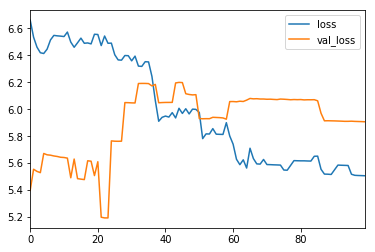

In [162]:
his[['loss','val_loss']].plot()

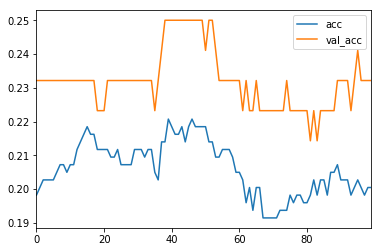

In [163]:
his[['acc','val_acc']].plot()

In [0]:
# Artificial Neural Networks
ann_model = Sequential()
ann_model.add(Dense(units=256,input_shape=[10],activation='relu'))
ann_model.add(Dense(500,activation='relu'))
ann_model.add(Dense(500,activation='relu'))
ann_model.add(Dense(units=4))

In [0]:
ann_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [166]:
ann_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 256)               2816      
_________________________________________________________________
dense_94 (Dense)             (None, 500)               128500    
_________________________________________________________________
dense_95 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_96 (Dense)             (None, 4)                 2004      
Total params: 383,820
Trainable params: 383,820
Non-trainable params: 0
_________________________________________________________________


In [167]:
ann_result = ann_model.fit(x=x_train,y=y_train,batch_size=16,epochs=100,validation_data=[x_test,y_test],callbacks=[PrintDot()])

Train on 444 samples, validate on 112 samples
Epoch 1/100
444/444 [==============================] - 3s 7ms/step - loss: 7.7034 - acc: 0.3018 - val_loss: 8.8178 - val_acc: 0.3839

.Epoch 2/100
444/444 [==============================] - 0s 940us/step - loss: 7.3033 - acc: 0.3108 - val_loss: 5.6872 - val_acc: 0.3482
Epoch 3/100
444/444 [==============================] - 0s 906us/step - loss: 8.2577 - acc: 0.2410 - val_loss: 10.9464 - val_acc: 0.2143
Epoch 4/100
444/444 [==============================] - 0s 931us/step - loss: 9.0686 - acc: 0.2275 - val_loss: 5.1991 - val_acc: 0.2143
Epoch 5/100
444/444 [==============================] - 0s 931us/step - loss: 4.3880 - acc: 0.2342 - val_loss: 3.5545 - val_acc: 0.2143
Epoch 6/100
444/444 [==============================] - 0s 919us/step - loss: 9.6644 - acc: 0.2342 - val_loss: 12.6642 - val_acc: 0.2143
Epoch 7/100
444/444 [==============================] - 0s 1ms/step - loss: 12.3427 - acc: 0.2342 - val_loss: 12.6642 - val_acc: 0.2143
Epoch 8

In [168]:
his3 = pd.DataFrame(ann_result.history)
his3.head()

,val_loss,val_acc,loss,acc
0,8.817767,0.383929,7.703404,0.301802
1,5.687231,0.348214,7.303335,0.310811
2,10.946387,0.214286,8.257710,0.240991
3,5.199063,0.214286,9.068629,0.227477
4,3.554471,0.214286,4.388046,0.234234


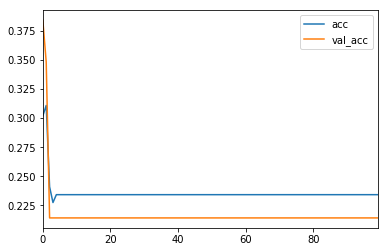

In [169]:
his3[['acc','val_acc']].plot()

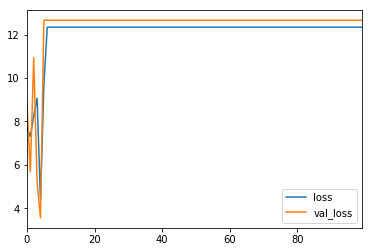

In [170]:
his3[['loss','val_loss']].plot()

## Now, let’s try the L2 regularizer over it and check whether it gives better results than a simple neural network model.

In [171]:
from keras import regularizers

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.01)),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.01)),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.01)),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.01)),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.01)),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, activation="relu", kernel_regularizer=<keras.reg..., units=1024)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", kernel_regularizer=<keras.reg..., units=1024)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", kernel_regularizer=<keras.reg..., units=1024)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", kernel_regularizer=<keras.reg..., units=1024)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_la

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#trained_model_5d = model.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

In [173]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 1024)              11264     
_________________________________________________________________
dense_98 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_99 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_100 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_101 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_102 (Dense)            (None, 4)                 4100      
Total params: 4,213,764
Trainable params: 4,213,764
Non-trainable params: 0
_________________________________________________________________


In [174]:
result = model.fit(x=x_train,y=y_train,batch_size=16,epochs=100,validation_data=[x_test,y_test],callbacks=[PrintDot()])

Train on 444 samples, validate on 112 samples
Epoch 1/100
444/444 [==============================] - 7s 16ms/step - loss: 22.8181 - acc: 0.3851 - val_loss: 8.1568 - val_acc: 0.4643

.Epoch 2/100
444/444 [==============================] - 3s 7ms/step - loss: 4.1034 - acc: 0.4437 - val_loss: 1.9123 - val_acc: 0.5357
Epoch 3/100
444/444 [==============================] - 3s 7ms/step - loss: 1.5182 - acc: 0.4977 - val_loss: 1.3114 - val_acc: 0.4643
Epoch 4/100
444/444 [==============================] - 3s 7ms/step - loss: 1.3289 - acc: 0.4414 - val_loss: 1.3046 - val_acc: 0.5089
Epoch 5/100
444/444 [==============================] - 3s 7ms/step - loss: 1.2940 - acc: 0.4752 - val_loss: 1.2687 - val_acc: 0.4643
Epoch 6/100
444/444 [==============================] - 3s 7ms/step - loss: 1.2463 - acc: 0.4617 - val_loss: 1.2301 - val_acc: 0.4821
Epoch 7/100
444/444 [==============================] - 3s 7ms/step - loss: 1.2115 - acc: 0.4842 - val_loss: 1.2103 - val_acc: 0.5000
Epoch 8/100
444/444

In [175]:
his4 = pd.DataFrame(result.history)
his4.head()

,val_loss,val_acc,loss,acc
0,8.156784,0.464286,22.818119,0.385135
1,1.912350,0.535714,4.103387,0.443694
2,1.311384,0.464286,1.518207,0.497748
3,1.304636,0.508929,1.328934,0.441441
4,1.268714,0.464286,1.293968,0.475225


Text(0.5, 1.0, 'L2 Regularization for Accuracy')

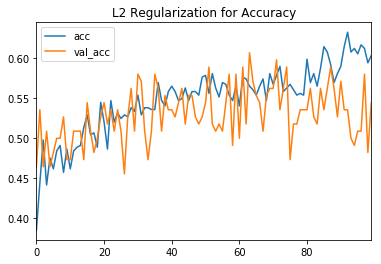

In [198]:
his4[['acc','val_acc']].plot()
plt.title('L2 Regularization for Accuracy')

Text(0.5, 1.0, 'L2 Regularization for Loss')

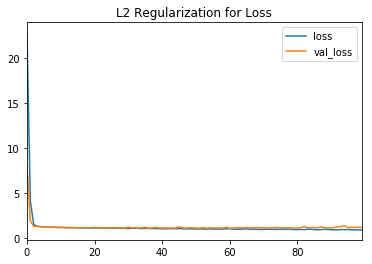

In [197]:
his4[['loss','val_loss']].plot()
plt.title('L2 Regularization for Loss')

## Now, let’s try the L1 regularization technique.

In [178]:
## l1

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.01)),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.01)),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.01)),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.01)),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.01)),
 Dense(output_dim=hidden3_num_units, input_dim=1024, activation='relu',
 kernel_regularizer=regularizers.l1(0.01)),
 Dense(output_dim=hidden4_num_units, input_dim=1024, activation='relu',
 kernel_regularizer=regularizers.l1(0.01)),
 Dense(output_dim=hidden5_num_units, input_dim=1024, activation='relu',
 kernel_regularizer=regularizers.l1(0.01)),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, activation="relu", kernel_regularizer=<keras.reg..., units=1024)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", kernel_regularizer=<keras.reg..., units=1024)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", kernel_regularizer=<keras.reg..., units=1024)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", kernel_regularizer=<keras.reg..., units=1024)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

In [179]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_l1 = model.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(x_test, y_test),callbacks=[PrintDot()])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 444 samples, validate on 112 samples
Epoch 1/100
444/444 [==============================] - 5s 11ms/step - loss: 1918.4241 - acc: 0.2680 - val_loss: 1748.3890 - val_acc: 0.2857

.Epoch 2/100
444/444 [==============================] - 1s 3ms/step - loss: 1667.3223 - acc: 0.2860 - val_loss: 1496.1791 - val_acc: 0.2857
Epoch 3/100
444/444 [==============================] - 1s 3ms/step - loss: 1420.0358 - acc: 0.2860 - val_loss: 1260.7716 - val_acc: 0.2857
Epoch 4/100
444/444 [==============================] - 1s 3ms/step - loss: 1190.8365 - acc: 0.2860 - val_loss: 1045.5829 - val_acc: 0.2857
Epoch 5/100
444/444 [==============================] - 1s 3ms/step - loss: 982.2178 - acc: 0.2860 - val_loss: 851.1970 - val_acc: 0.2857
Epoch 6/100
444/444 [==============================] - 1s 3ms/step - loss: 794.6346 - acc: 0.2860 - val_loss: 678.0688 - val_acc: 0.2857
Epoch 7/100
444/444 [==============================] - 1s 3ms/step - loss: 628.2320 - acc: 0.2860 - val_loss: 526.2386 - 

In [180]:
df2 = pd.DataFrame(trained_model_l1.history)
df.head()

,val_loss,val_acc,loss,acc
0,1.253857,0.446429,1.352292,0.274775
1,1.120255,0.517857,1.242604,0.398649
2,1.089754,0.535714,1.150188,0.484234
3,1.076779,0.526786,1.127676,0.524775
4,1.056085,0.526786,1.088578,0.533784


Text(0.5, 1.0, 'L1 Regularization')

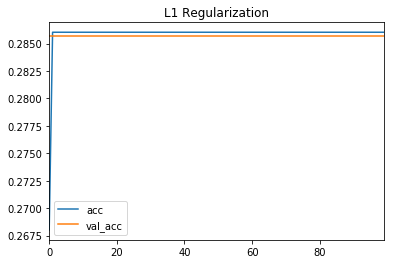

In [195]:
df2[['acc','val_acc']].plot()
plt.title('L1 Regularization')

Text(0.5, 1.0, 'L1 Regularization for Loss')

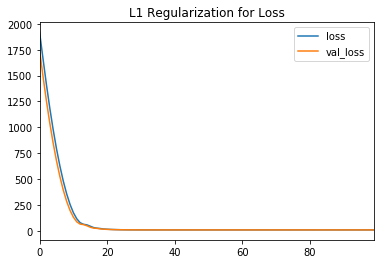

In [196]:
df2[['loss','val_loss']].plot()
plt.title('L1 Regularization for Loss')

In [183]:
## dropout

from keras.layers.core import Dropout
model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.25),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, activation="relu", units=1024)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", units=1024)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", units=1024)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", units=1024)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", units=1024)`
  if sys.path[0

In [184]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(x_test, y_test),callbacks=[PrintDot()])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 444 samples, validate on 112 samples
Epoch 1/100
444/444 [==============================] - 4s 10ms/step - loss: 1.3688 - acc: 0.2500 - val_loss: 1.2034 - val_acc: 0.5357

.Epoch 2/100
444/444 [==============================] - 1s 1ms/step - loss: 1.1820 - acc: 0.4842 - val_loss: 1.1942 - val_acc: 0.5179
Epoch 3/100
444/444 [==============================] - 1s 1ms/step - loss: 1.1623 - acc: 0.4685 - val_loss: 1.1259 - val_acc: 0.5089
Epoch 4/100
444/444 [==============================] - 1s 1ms/step - loss: 1.0935 - acc: 0.5405 - val_loss: 1.0937 - val_acc: 0.5357
Epoch 5/100
444/444 [==============================] - 1s 1ms/step - loss: 1.0537 - acc: 0.5495 - val_loss: 1.0442 - val_acc: 0.5536
Epoch 6/100
444/444 [==============================] - 1s 1ms/step - loss: 1.0064 - acc: 0.5541 - val_loss: 1.0587 - val_acc: 0.5625
Epoch 7/100
444/444 [==============================] - 1s 1ms/step - loss: 0.9546 - acc: 0.5833 - val_loss: 1.0125 - val_acc: 0.5714
Epoch 8/100
444/444 

In [185]:
df = pd.DataFrame(trained_model_5d.history)
df.head()

,val_loss,val_acc,loss,acc
0,1.203432,0.535714,1.368786,0.250000
1,1.194191,0.517857,1.182002,0.484234
2,1.125850,0.508929,1.162309,0.468468
3,1.093673,0.535714,1.093521,0.540541
4,1.044199,0.553571,1.053748,0.549550


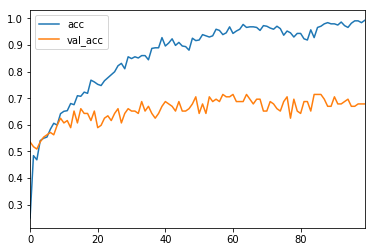

In [186]:
df[['acc','val_acc']].plot()

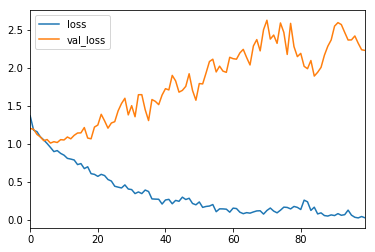

In [187]:
df[['loss','val_loss']].plot()

In [0]:
from keras.callbacks import TensorBoard

In [0]:
tb = TensorBoard('./reg2')

In [190]:
model.fit(x=x_train,y=y_train,batch_size=30,epochs=100,validation_data=[x_test,y_test],callbacks=[tb])

Train on 444 samples, validate on 112 samples
Epoch 1/100
444/444 [==============================] - 1s 3ms/step - loss: 0.0866 - acc: 0.9685 - val_loss: 2.4022 - val_acc: 0.6875
Epoch 2/100
444/444 [==============================] - 2s 3ms/step - loss: 0.3744 - acc: 0.9144 - val_loss: 1.9621 - val_acc: 0.6518
Epoch 3/100
444/444 [==============================] - 1s 3ms/step - loss: 0.4356 - acc: 0.8649 - val_loss: 1.2519 - val_acc: 0.6786
Epoch 4/100
444/444 [==============================] - 1s 3ms/step - loss: 0.3397 - acc: 0.8851 - val_loss: 1.5362 - val_acc: 0.6339
Epoch 5/100
444/444 [==============================] - 1s 3ms/step - loss: 0.2967 - acc: 0.8806 - val_loss: 1.9372 - val_acc: 0.6786
Epoch 6/100
444/444 [==============================] - 1s 3ms/step - loss: 0.3979 - acc: 0.8671 - val_loss: 1.6951 - val_acc: 0.6339
Epoch 7/100
444/444 [==============================] - 1s 3ms/step - loss: 0.2725 - acc: 0.8919 - val_loss: 1.8301 - val_acc: 0.6786
Epoch 8/100
444/444 [==

In [191]:
LOG_DIR = './reg'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6007 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6007 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.6/json/__init__.py", line 299, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.6/json/__init__.py", line 354, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.6/json/decoder.py", line 339, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.6/json/decoder.py", line 357, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)
